In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
df = pd.read_csv('ai4i2020.csv')
df.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [3]:
from scipy.stats import chi2_contingency
# Assuming your dataset is stored in a pandas DataFrame called 'df'
features = df.drop(['Machine failure','UDI','Product ID','HDF','OSF','PWF','TWF','RNF'], axis=1)  # Exclude the target variable
target = df['Machine failure']
chi2_scores, p_values = [], []
for feature in features.columns:
    contingency_table = pd.crosstab(features[feature], target)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_scores.append(chi2)
    p_values.append(p)
result = pd.DataFrame({'Feature': features.columns, 'Chi-Square': chi2_scores, 'p-value': p_values})
result = result.sort_values(by='Chi-Square', ascending=False)  # or by 'p-value'
print(result)

                   Feature   Chi-Square        p-value
4              Torque [Nm]  3526.615358   0.000000e+00
3   Rotational speed [rpm]  2553.945201  3.843935e-149
5          Tool wear [min]   889.304920   6.480426e-74
1      Air temperature [K]   293.451717   7.079437e-23
2  Process temperature [K]   140.366155   4.789922e-05
0                     Type    13.751717   1.032411e-03


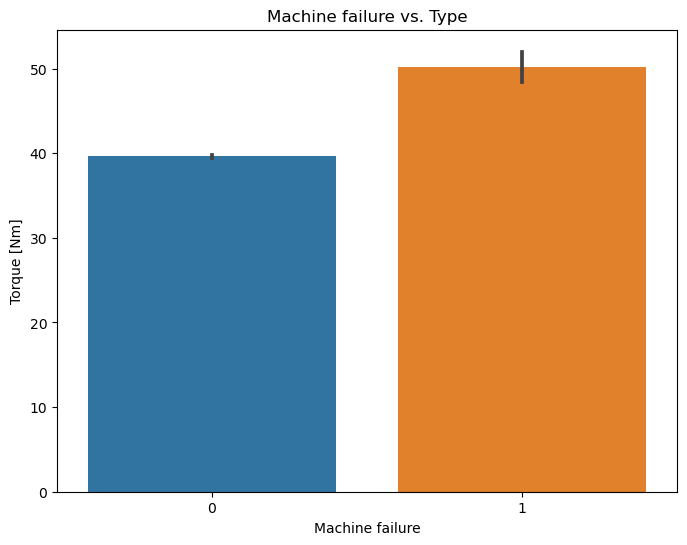

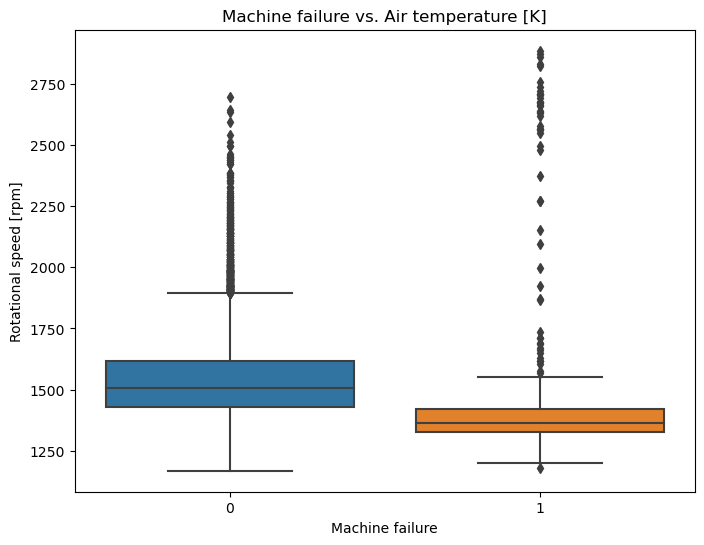

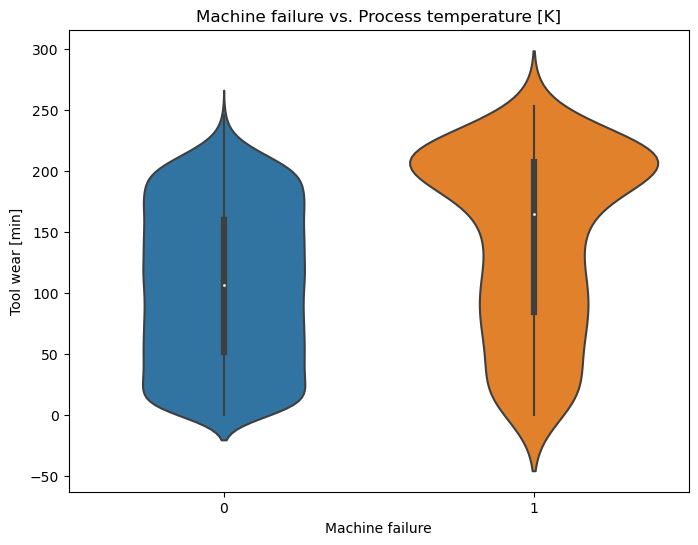

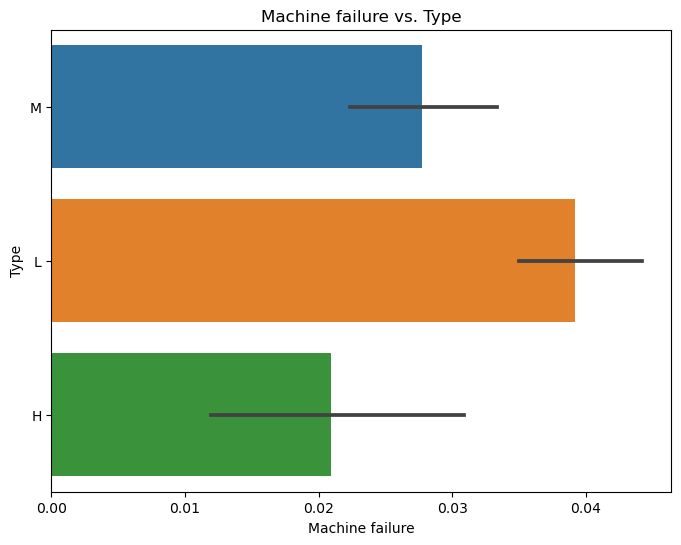

In [4]:

# Bar plot: Machine failure vs. Type
plt.figure(figsize=(8, 6))
sns.barplot(x='Machine failure', y='Torque [Nm]', data=df)
plt.title('Machine failure vs. Type')
plt.show()

# Box plot: Machine failure vs. Air temperature [K]
plt.figure(figsize=(8, 6))
sns.boxplot(x='Machine failure', y='Rotational speed [rpm]', data=df)
plt.title('Machine failure vs. Air temperature [K]')
plt.show()

# Violin plot: Machine failure vs. Process temperature [K]
plt.figure(figsize=(8, 6))
sns.violinplot(x='Machine failure', y='Tool wear [min]', data=df)
plt.title('Machine failure vs. Process temperature [K]')
plt.show()

# Bar plot: Machine failure vs. Type
plt.figure(figsize=(8, 6))
sns.barplot(x='Machine failure', y='Type', data=df)
plt.title('Machine failure vs. Type')
plt.show()


In [5]:
df_air = df["Air temperature [K]"]

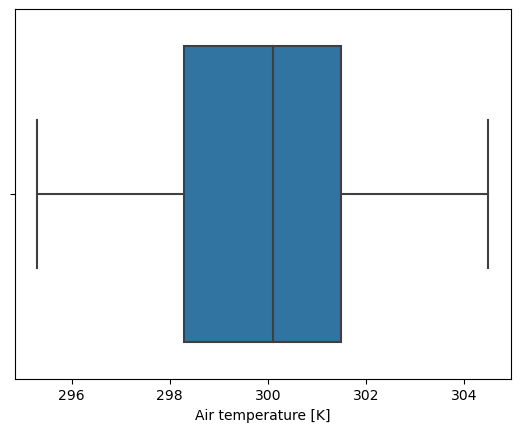

In [6]:
sns.boxplot(x = df_air);

In [7]:
Q1 = df_air.quantile(0.25)
Q3 = df_air.quantile(0.75);
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
annomalies=(df_air < lower_limit ) | (df_air > upper_limit)
#demekki bu attribute içerisinde aykırı değer yok 
df_air[annomalies]

Series([], Name: Air temperature [K], dtype: float64)

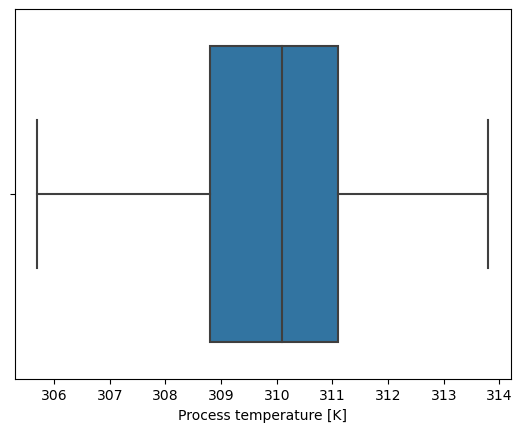

In [8]:
## process temperatrue için 
df_process = df["Process temperature [K]"]
sns.boxplot(x = df_process);

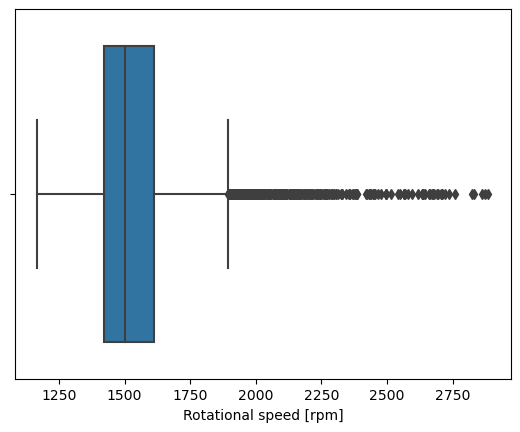

In [9]:
df_rotational = df["Rotational speed [rpm]"]
sns.boxplot(x = df_rotational);

In [10]:
Q1 =df["Rotational speed [rpm]"].quantile(0.25)
Q3 = df["Rotational speed [rpm]"].quantile(0.75)
IQR = Q3 - Q1
upper_limit= Q3 + 1.5 * IQR
annomalies = df["Rotational speed [rpm]"] > upper_limit
df.loc[annomalies, "Rotational speed [rpm]"] = upper_limit
df_rotational = df["Rotational speed [rpm]"]

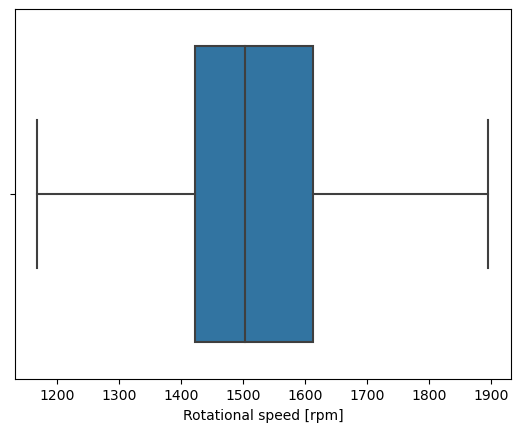

In [11]:
sns.boxplot(x = df_rotational);

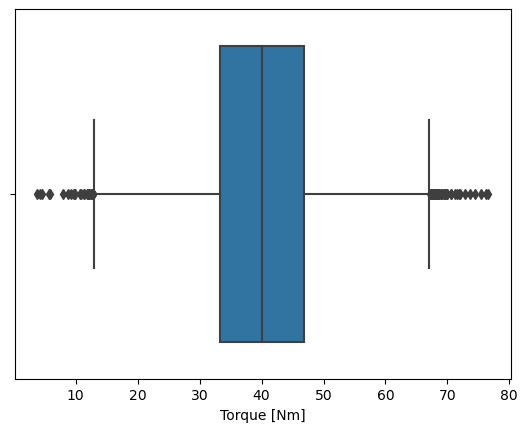

In [12]:
df_torque = df["Torque [Nm]"]
sns.boxplot(x = df_torque);

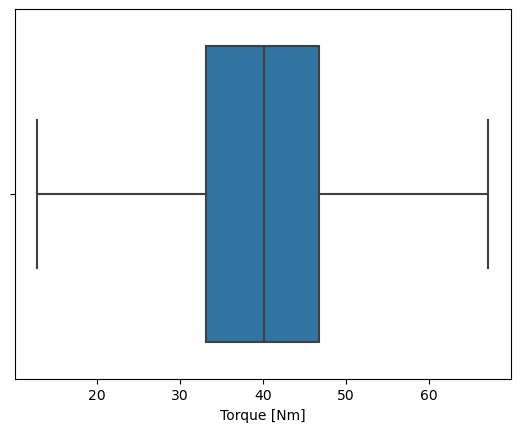

In [13]:
Q1 =df["Torque [Nm]"].quantile(0.25)
Q3 = df["Torque [Nm]"].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit= Q3 + 1.5 * IQR
lower_annomalies = df["Torque [Nm]"] < lower_limit
upper_annomalies = df["Torque [Nm]"] > upper_limit
df.loc[lower_annomalies, "Torque [Nm]"] = lower_limit
df.loc[upper_annomalies, "Torque [Nm]"] = upper_limit
df_torque = df["Torque [Nm]"]
sns.boxplot(x = df_torque);

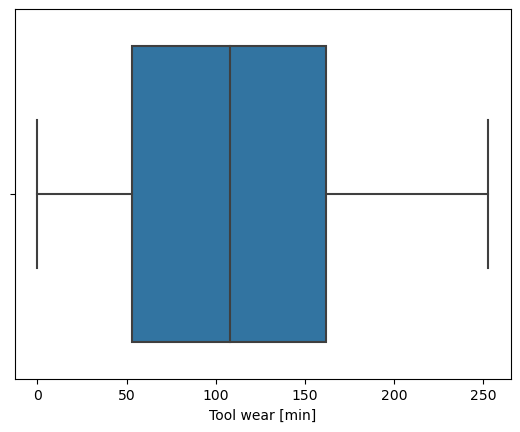

In [14]:
#Anomali yok 
df_tool = df["Tool wear [min]"]
sns.boxplot(x = df_tool);

In [15]:
### Label Encoder Method

In [16]:

from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
df["Encoded Type"] = lbe.fit_transform(df["Type"])

In [17]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Encoded Type
0,1,M14860,M,298.1,308.6,1551.0,42.8,0,0,0,0,0,0,0,2
1,2,L47181,L,298.2,308.7,1408.0,46.3,3,0,0,0,0,0,0,1
2,3,L47182,L,298.1,308.5,1498.0,49.4,5,0,0,0,0,0,0,1
3,4,L47183,L,298.2,308.6,1433.0,39.5,7,0,0,0,0,0,0,1
4,5,L47184,L,298.2,308.7,1408.0,40.0,9,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604.0,29.5,14,0,0,0,0,0,0,2
9996,9997,H39410,H,298.9,308.4,1632.0,31.8,17,0,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645.0,33.4,22,0,0,0,0,0,0,2
9998,9999,H39412,H,299.0,308.7,1408.0,48.5,25,0,0,0,0,0,0,0


In [18]:
### Dummy Method / One Hot Method
df_one_hot = pd.get_dummies(df , columns = ["Type"] , prefix = ["Type"])
df[df_one_hot.columns] = df_one_hot

In [19]:
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  float64
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
 14  Encoded Type           

In [20]:
# fark fazla
df["Machine failure"].value_counts()

0    9661
1     339
Name: Machine failure, dtype: int64

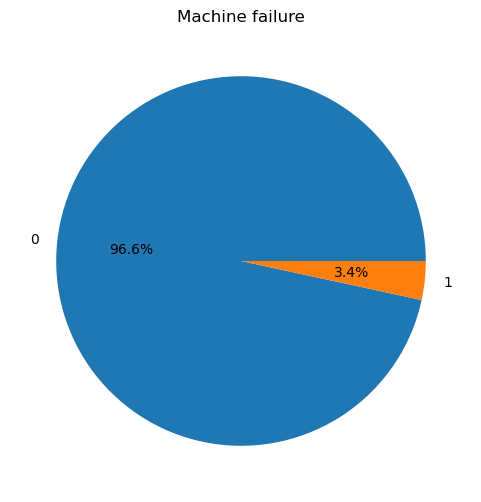

In [21]:
plt.figure(figsize=(6, 6))
df["Machine failure"].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Machine failure')
plt.show()

In [22]:
## sınıf dengesinin hesaplanması 
def calculate_class_balance_ratio(df, target_column):
    class_counts = df[target_column].value_counts()
    min_class_count = class_counts.min()
    class_balance_ratio = class_counts / min_class_count
    return class_balance_ratio



class_balance_ratio = calculate_class_balance_ratio(df, 'Machine failure')
print(class_balance_ratio)

0    28.498525
1     1.000000
Name: Machine failure, dtype: float64


In [23]:
df = df.select_dtypes(include = ['float64' , 'int64','int32'])
df = df.drop('UDI',axis =1)

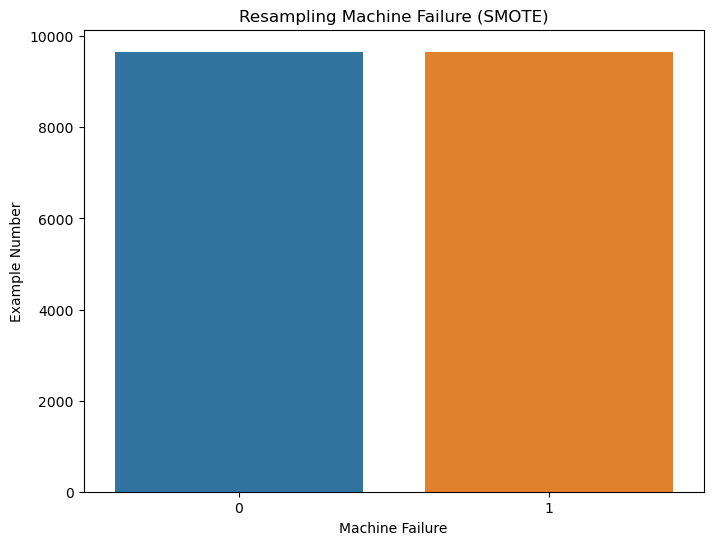

In [24]:
## for smooth method
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


# SMOTE'u kullanarak veriyi yeniden örnekleyelim
X = df.drop('Machine failure', axis=1)
y = df['Machine failure']
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Yeniden örneklenmiş verileri içeren DataFrame oluşturalım
df = pd.DataFrame(X_resampled, columns=['Air temperature [K]' , 'Process temperature [K]', 'Rotational speed [rpm]','Torque [Nm]','Encoded Type', 'Tool wear [min]'])
df['Machine failure'] = y_resampled

# Sınıf dağılımını çubuk grafik ile görselleştirelim (yeniden örneklenmiş veri)
plt.figure(figsize=(8, 6))
sns.countplot(x='Machine failure', data=df)
plt.xlabel('Machine Failure')
plt.ylabel('Example Number')
plt.title('Resampling Machine Failure (SMOTE)')
plt.show()


In [25]:
df.tail()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Encoded Type,Tool wear [min],Machine failure
19317,300.499654,309.900000,1396.994807,45.901385,0,210,1
19318,298.416432,308.583621,1895.500000,12.800000,2,85,1
19319,299.552915,311.008801,1717.148538,27.882287,1,221,1
19320,301.258978,310.516465,1688.631647,30.454791,2,226,1
19321,302.020253,310.550316,1369.091785,46.797472,2,71,1


In [26]:
from sklearn.model_selection import train_test_split


# Bağımsız değişkenler (X) ve bağımlı değişken (y) olarak veriyi ayıralım
X = df.drop('Machine failure', axis=1)
y = df['Machine failure']



# Veri setini train ve test setlere bölelim (test_size parametresi test setin yüzdesini belirler)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# # Train setini görüntüleyelim
# print("X_train:")
# print(X_train)
# print("X_test:")
# print(y_train)

# # Test setini görüntüleyelim
# print("X_test:")
# print(X_test)
# print("y_test:")
# print(y_test)




In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# # Özellikleri ve hedef değişkeni ayırın
# X = df.drop('Machine failure', axis=1)
# y = df['Machine failure']

# # Veri kümesini eğitim ve test kümelerine ayırın
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()



X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Sonuçları gösterin
print("Eğitim Veri Kümesi X:")
print(X_train)
print("Eğitim Veri Kümesi Y:")
print(y_train)

print("\nTest Veri Kümesi X:")
print(X_test)
print("\nTest Veri Kümesi Y:")
print(y_test)

Eğitim Veri Kümesi X:
[[ 0.12705868 -0.03807278  0.49143845 -0.34296053 -0.15409919 -0.62422486]
 [ 0.87707961  0.28737407 -1.13385013  1.12284667 -2.04450492 -1.4656668 ]
 [ 1.51000023  1.99523814  0.63520097 -0.62846507  1.73630654 -0.16784957]
 ...
 [ 1.20267989  1.61869908  0.0198974   0.1694835  -2.04450492  1.4009405 ]
 [-2.22906397 -2.44792277  0.35342644 -0.89932834 -2.04450492 -1.3087878 ]
 [ 1.46802698  1.1895112  -0.65118094  0.47040671 -2.04450492 -0.22489648]]
Eğitim Veri Kümesi Y:
6455     0
11778    1
5352     0
1215     0
18559    1
        ..
11284    1
11964    1
5390     0
860      0
15795    1
Name: Machine failure, Length: 15457, dtype: int64

Test Veri Kümesi X:
[[ 1.10023977  1.61869908  0.42818295 -0.21118921 -0.15409919 -0.9522446 ]
 [-0.82054775 -1.34602746 -1.2411573   1.63360932 -0.15409919 -0.68127177]
 [ 1.04901972  1.31746783  0.30167193 -0.44544934  1.73630654 -0.41029894]
 ...
 [-1.76808345 -1.84546027  0.12915691 -0.40152556 -0.15409919  0.0175529 ]
 [

In [28]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# # # Bağımsız değişkenler (X) ve bağımlı değişken (y) olarak veriyi ayıralım
# # X = df.drop('Machine failure', axis=1)
# # y = df['Machine failure']

# # # Veri setini train ve test setlere bölelim (test_size parametresi test setin yüzdesini belirler)
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Random Forest modelini oluşturalım ve eğitelim
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)

# # Test setini kullanarak tahmin yapalım
# y_pred = rf.predict(X_test)

# # Modelin performansını değerlendirelim
# accuracy = accuracy_score(y_test, y_pred)
# print("Model Accuracy:", accuracy)

# # Sınıflandırma raporu ve karışıklık matrisini görüntüleyelim
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))


In [29]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# # from sklearn.model_selection import train_test_split
# import pandas as pd



# # # Bağımsız değişkenler (X) ve bağımlı değişken (y) olarak veriyi ayıralım
# # X = df.drop('Machine failure', axis=1)
# # y = df['Machine failure']

# # # Veri setini train ve test setlere bölelim (test_size parametresi test setin yüzdesini belirler)
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # SVM modelini oluşturalım ve eğitelim
# svm = SVC(kernel='linear', C=1.0, random_state=42)
# svm.fit(X_train, y_train)

# # Test setini kullanarak tahmin yapalım
# y_pred = svm.predict(X_test)

# # Modelin performansını değerlendirelim
# accuracy = accuracy_score(y_test, y_pred)
# print("Model Accuracy:", accuracy)

# # Sınıflandırma raporu ve karışıklık matrisini görüntüleyelim
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))


In [30]:
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# # from sklearn.model_selection import train_test_split
# import pandas as pd


# # # Bağımsız değişkenler (X) ve bağımlı değişken (y) olarak veriyi ayıralım
# # X = df.drop('Machine failure', axis=1)
# # y = df['Machine failure']

# # # Veri setini train ve test setlere bölelim (test_size parametresi test setin yüzdesini belirler)
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Naive Bayes modelini oluşturalım ve eğitelim
# nb = GaussianNB()
# nb.fit(X_train, y_train)

# # Test setini kullanarak tahmin yapalım
# y_pred = nb.predict(X_test)

# # Modelin performansını değerlendirelim
# accuracy = accuracy_score(y_test, y_pred)
# print("Model Accuracy:", accuracy)

# # Sınıflandırma raporu ve karışıklık matrisini görüntüleyelim
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))


In [31]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from keras.models import Sequential
# from keras.layers import LSTM, Dense


# # LSTM modelini oluşturalım
# model = Sequential()
# model.add(LSTM(10, input_shape=(X_train.shape[1], 1)))  # LSTM katmanı
# model.add(Dense(1, activation='sigmoid'))  # Çıkış katmanı (binary classification için sigmoid aktivasyonu)

# # Modeli derleyelim
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # LSTM için giriş verilerini yeniden şekillendirme (reshape)
# X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# # Modeli eğitelim
# model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=1)

# # Test seti üzerinde modeli değerlendirelim
# loss, accuracy = model.evaluate(X_test_reshaped, y_test)
# print("Test Loss:", loss)
# print("Test Accuracy:", accuracy)

In [32]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from keras.models import Sequential
# from keras.layers import Dense


# # CNN modelini oluşturalım
# input_dim = X_train.shape[1]

# model = Sequential()
# model.add(Dense(64, input_dim=input_dim, activation='relu'))  # Giriş katmanı
# model.add(Dense(32, activation='relu'))  # Gizli katman
# model.add(Dense(1, activation='sigmoid'))  # Çıkış katmanı (binary classification için sigmoid aktivasyonu)

# # Modeli derleyelim
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Modeli eğitelim
# model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# # Test seti üzerinde modeli değerlendirelim
# loss, accuracy = model.evaluate(X_test, y_test)
# print("Test Loss:", loss)
# print("Test Accuracy:", accuracy)


In [33]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from keras.models import Sequential
# from keras.layers import Dense, SimpleRNN

In [34]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# import numpy as np
# from keras.models import Sequential
# from keras.layers import Dense, SimpleRNN


# # RNN modelini oluşturalım
# input_dim = X_train.shape[1]
# timesteps = 1  # Zaman adımı sayısı (zaman serisi olmadığı için 1 zaman adımı yeterli)

# model = Sequential()
# model.add(SimpleRNN(32, input_shape=(timesteps, input_dim), activation='relu'))  # RNN katmanı
# model.add(Dense(1, activation='sigmoid'))  # Çıkış katmanı (binary classification için sigmoid aktivasyonu)

# # Modeli derleyelim
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Verileri uygun şekilde yeniden boyutlandıralım (RNN için 3B tensörlere ihtiyacımız var)
# X_train_reshaped = np.array(X_train).reshape(-1, timesteps, input_dim)
# X_test_reshaped = np.array(X_test).reshape(-1, timesteps, input_dim)

# # Modeli eğitelim
# model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1)

# # Test seti üzerinde modeli değerlendirelim
# loss, accuracy = model.evaluate(X_test_reshaped, y_test)
# print("Test Loss:", loss)
# print("Test Accuracy:", accuracy)



In [35]:


import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# FNN modelini oluşturun ve eğitin
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy']);

model.fit(X_train, y_train, epochs=20, batch_size=32);

# Test seti üzerinde modeli değerlendirelim
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
484/484 [==============================] - 1s 741us/step - loss: 0.3804 - accuracy: 0.8305
Epoch 2/20
484/484 [==============================] - 0s 732us/step - loss: 0.2457 - accuracy: 0.9022
Epoch 3/20
484/484 [==============================] - 0s 733us/step - loss: 0.2108 - accuracy: 0.9220
Epoch 4/20
484/484 [==============================] - 0s 730us/step - loss: 0.1911 - accuracy: 0.9286
Epoch 5/20
484/484 [==============================] - 0s 740us/step - loss: 0.1815 - accuracy: 0.9333
Epoch 6/20
484/484 [==============================] - 0s 732us/step - loss: 0.1712 - accuracy: 0.9363
Epoch 7/20
484/484 [==============================] - 0s 736us/step - loss: 0.1651 - accuracy: 0.9384
Epoch 8/20
484/484 [==============================] - 0s 790us/step - loss: 0.1606 - accuracy: 0.9404
Epoch 9/20
484/484 [==============================] - 0s 828us/step - loss: 0.1571 - accuracy: 0.9415
Epoch 10/20
484/484 [==============================] - 0s 753us/step - loss: 0.153

In [36]:
from tensorflow.keras.models import save_model

# Diyelim ki modeliniz 'model' adlı bir değişkende bulunuyor
save_model(model, 'my_model.keras')

In [ ]:
from flask import Flask, render_template, request
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.models import load_model


app = Flask(__name__)

# Modeli yükle
model = load_model("my_model.keras")
@app.route('/' , methods=['GET'])
def index():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    # Kullanıcıdan giriş verilerini alın
    air_temp = float(request.form['air_temp'])
    process_temp = float(request.form['process_temp'])
    rotational_speed = float(request.form['rotational_speed'])
    torque = float(request.form['torque'])
    encoded_type = float(request.form['encoded_type'])
    tool_wear = float(request.form['tool_wear'])
    
    
    input_data = np.array([[air_temp, process_temp, rotational_speed, torque,encoded_type, tool_wear]])
    input_df = pd.DataFrame(input_data, columns=['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]','Encoded Type', 'Tool wear [min]'])
    arr = np.array(input_df)
    print(arr)
    # Ölçekleme işlemini gerçekleştirin
    input_scaled = scaler.transform(arr)

    # Tahmin yap
    prediction = model.predict(input_scaled)
    print(prediction)
    # Tahmin sonucunu göstermek için bir mesaj oluştur
    if prediction[0, 0] >= 0.5:
        result_message = f"Machine failure risk is HIGH."
    else:
        result_message = f"Machine failure risk is LOW."
    
    return render_template('result.html', result_message=result_message)

if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [03/Aug/2023 10:03:10] "GET / HTTP/1.1" 200 -


[[5.600e+01 4.855e+03 4.850e+02 5.482e+03 2.000e+00 5.400e+01]]
[[5.600e+01 4.855e+03 4.850e+02 5.482e+03 2.000e+00 5.450e+02]]
1/1 [==============================] - 0s 59ms/step


C:\Users\merve\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\merve\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
127.0.0.1 - - [03/Aug/2023 10:03:21] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [03/Aug/2023 10:03:21] "POST /predict HTTP/1.1" 200 -


[[0.]]
[[0.]]


127.0.0.1 - - [03/Aug/2023 10:03:41] "POST /predict?Content-Type=application/json HTTP/1.1" 400 -
127.0.0.1 - - [03/Aug/2023 10:03:47] "POST /predict?Content-Type=application/json HTTP/1.1" 400 -
127.0.0.1 - - [03/Aug/2023 10:03:54] "POST /predict?Content-Type=application/json HTTP/1.1" 400 -
127.0.0.1 - - [03/Aug/2023 10:04:11] "POST /predict?Content-Type=application/json HTTP/1.1" 400 -
127.0.0.1 - - [03/Aug/2023 10:04:14] "POST /predict?Content-Type=application/json HTTP/1.1" 400 -
127.0.0.1 - - [03/Aug/2023 10:04:15] "POST /predict?Content-Type=application/json HTTP/1.1" 400 -
127.0.0.1 - - [03/Aug/2023 10:04:39] "POST /predict?Content-Type=application/json HTTP/1.1" 400 -
127.0.0.1 - - [03/Aug/2023 10:04:40] "POST /predict?Content-Type=application/json HTTP/1.1" 400 -
127.0.0.1 - - [03/Aug/2023 10:04:41] "POST /predict?Content-Type=application/json HTTP/1.1" 400 -
127.0.0.1 - - [03/Aug/2023 10:04:41] "POST /predict?Content-Type=application/json HTTP/1.1" 400 -
127.0.0.1 - - [03/Au

[[2.520e+01 3.002e+02 2.000e+03 5.200e+01 1.000e+00 5.425e+03]]
1/1 [==============================] - 0s 15ms/step


C:\Users\merve\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
127.0.0.1 - - [03/Aug/2023 10:14:05] "POST /predict HTTP/1.1" 200 -


[[1.]]
[[2.520e+01 3.002e+02 2.000e+03 5.200e+01 1.000e+00 5.425e+03]]
1/1 [==============================] - 0s 14ms/step


C:\Users\merve\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
127.0.0.1 - - [03/Aug/2023 10:14:21] "POST /predict HTTP/1.1" 200 -


[[1.]]
